In [1]:
# Научно-исследовательская работа
## Прогнозирование параметров роста растений с использованием методов машинного обучения

#В данной работе выполнены следующие этапы:
#1. Разведочный анализ данных (EDA)
#2. Обучение моделей машинного обучения
#3. Создание веб-приложения для демонстрации работы модели


In [2]:
## Часть 1: Разведочный анализ данных (EDA)

#Загрузим данные и выполним их предварительный анализ:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Загрузка данных
data_path = os.path.join('Processed_Plant_Growth_Metrics.csv')
df = pd.read_csv(data_path)

# Проверка на пустые столбцы
null_columns = df.columns[df.isnull().all()].tolist()
if null_columns:
    print(f"Столбцы с полностью пропущенными значениями: {null_columns}")
    df = df.drop(columns=null_columns)

# Вывод названий столбцов
print("\nНазвания столбцов в датасете:")
print(df.columns.tolist())

# Базовая информация о данных
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистическое описание:")
print(df.describe())
print("\nПропущенные значения:")
print(df.isnull().sum())


Столбцы с полностью пропущенными значениями: ['remainder__AWR']

Названия столбцов в датасете:
['cat__Class_SA', 'cat__Class_SB', 'cat__Class_SC', 'cat__Class_TA', 'cat__Class_TB', 'cat__Class_TC', 'remainder__ACHP', 'remainder__PHR', 'remainder__AWWGV', 'remainder__ALAP', 'remainder__ANPL', 'remainder__ARD', 'remainder__ADWR', 'remainder__PDMVG', 'remainder__ARL', 'remainder__AWWR', 'remainder__ADWV', 'remainder__PDMRG']

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cat__Class_SA     30000 non-null  float64
 1   cat__Class_SB     30000 non-null  float64
 2   cat__Class_SC     30000 non-null  float64
 3   cat__Class_TA     30000 non-null  float64
 4   cat__Class_TB     30000 non-null  float64
 5   cat__Class_TC     30000 non-null  float64
 6   remainder__ACHP   30000 non-null  float64
 7   remainder__PHR 

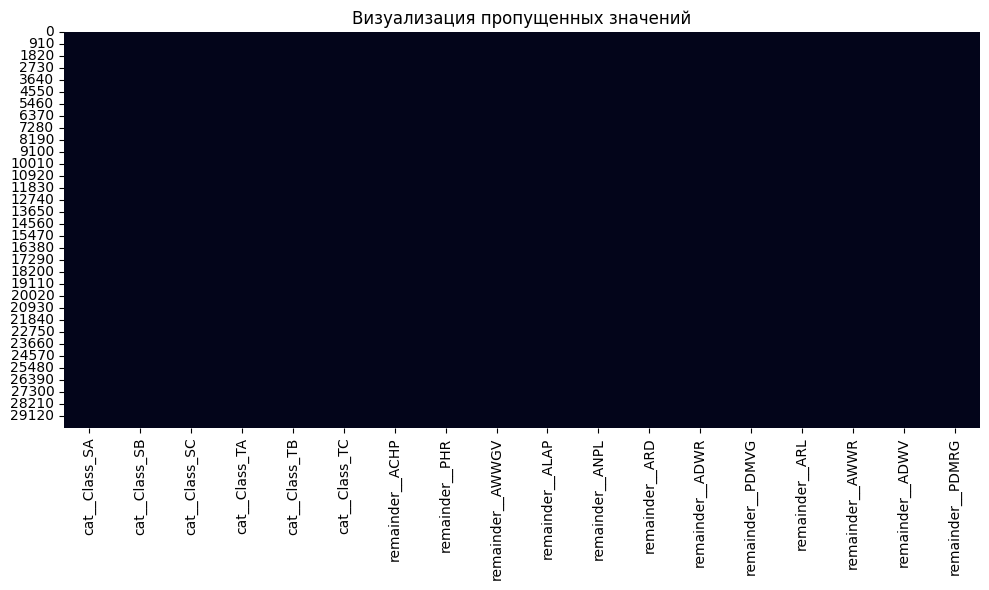

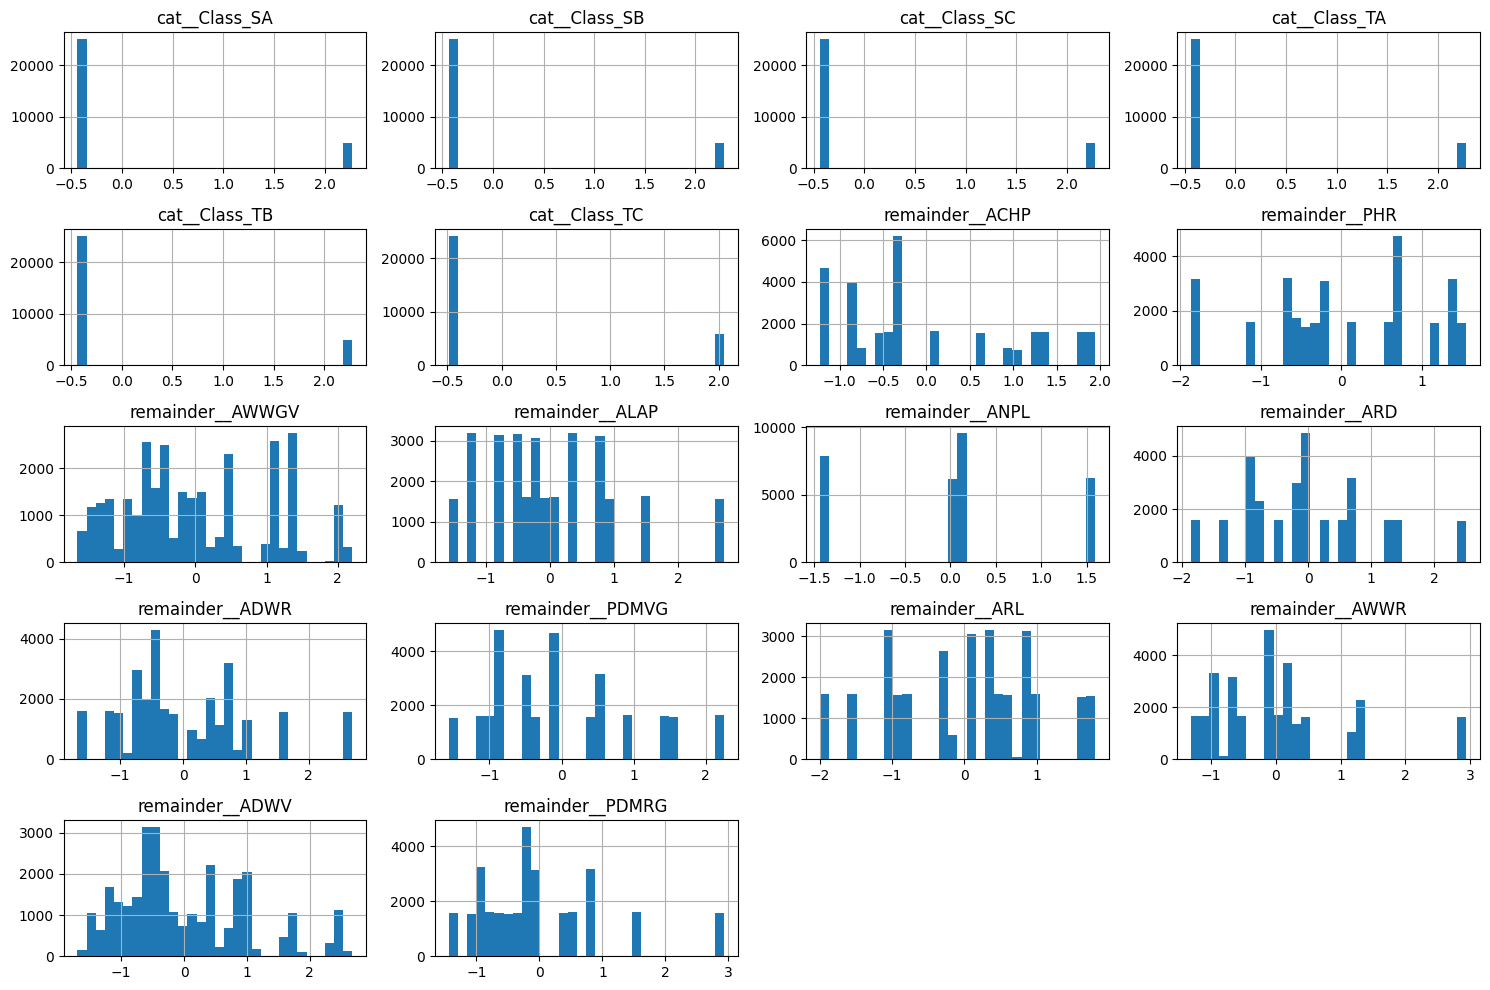

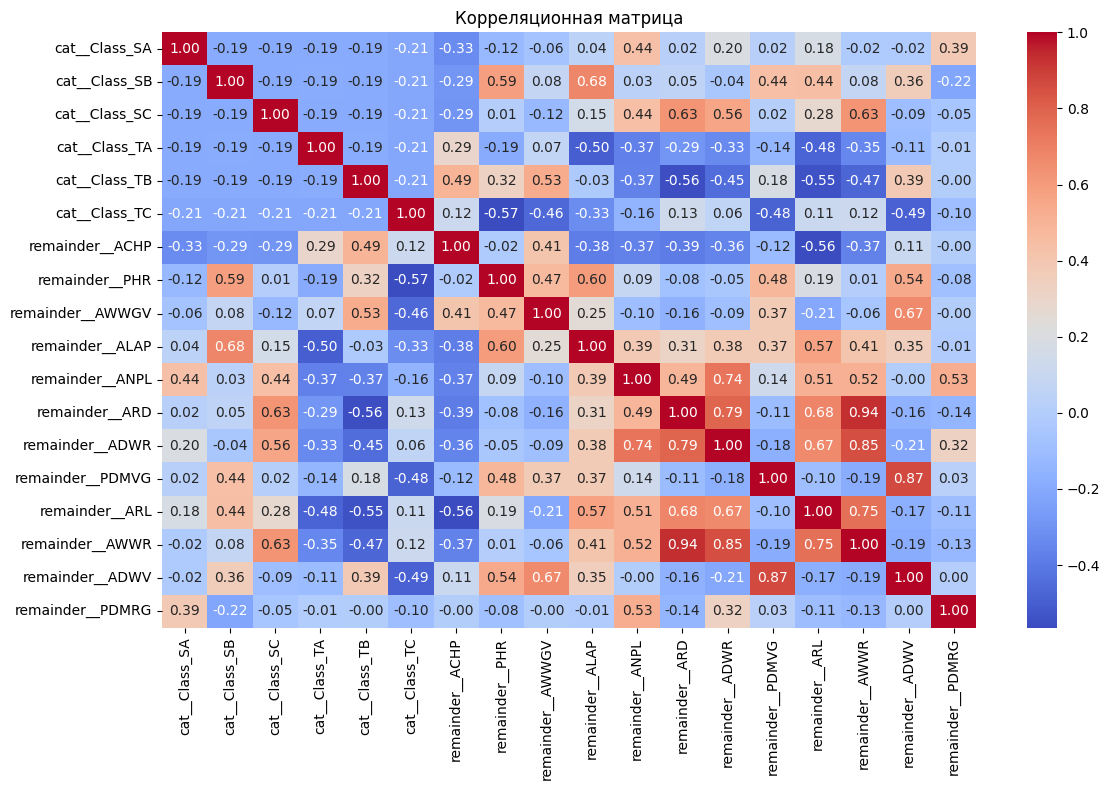

In [4]:
# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Визуализация пропущенных значений')
plt.tight_layout()
plt.savefig('missing_values.png')
plt.show()

# Гистограммы числовых признаков
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()


In [5]:
# Анализ корреляций для каждого признака
print("Корреляции между признаками:")
for column in df.columns:
    correlations = correlation_matrix[column].sort_values(ascending=False)
    print(f"\nКорреляции для {column}:")
    print(correlations[correlations != 1.0].head())


Корреляции между признаками:

Корреляции для cat__Class_SA:
remainder__ANPL     0.435479
remainder__PDMRG    0.386016
remainder__ADWR     0.196894
remainder__ARL      0.179463
remainder__ALAP     0.042609
Name: cat__Class_SA, dtype: float64

Корреляции для cat__Class_SB:
remainder__ALAP     0.681676
remainder__PHR      0.589063
remainder__ARL      0.443916
remainder__PDMVG    0.441312
remainder__ADWV     0.357822
Name: cat__Class_SB, dtype: float64

Корреляции для cat__Class_SC:
remainder__AWWR    0.630521
remainder__ARD     0.630288
remainder__ADWR    0.560465
remainder__ANPL    0.439477
remainder__ARL     0.277829
Name: cat__Class_SC, dtype: float64

Корреляции для cat__Class_TA:
remainder__ACHP     0.294040
remainder__AWWGV    0.071577
remainder__PDMRG   -0.006999
remainder__ADWV    -0.108477
remainder__PDMVG   -0.138413
Name: cat__Class_TA, dtype: float64

Корреляции для cat__Class_TB:
remainder__AWWGV    0.531077
remainder__ACHP     0.494167
remainder__ADWV     0.387205
remainder_

In [6]:
## Часть 2: Обучение моделей машинного обучения

#На основе проведенного анализа приступим к построению и обучению моделей:


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Подготовка данных для обучения моделей
# Выбираем целевую переменную (remainder__ACHP)
X = df.drop('remainder__ACHP', axis=1)  # Признаки
y = df['remainder__ACHP']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Сохранение предобработчиков для последующего использования
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')

# Определение моделей для сравнения
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}


Результаты базовых моделей:
                       MAE       MSE        R2
LinearRegression  0.436624  0.342456  0.649947
Ridge             0.436605  0.342446  0.649958
Lasso             0.857818  0.978672 -0.000381
RandomForest      0.083601  0.057026  0.941709
GradientBoosting  0.093159  0.060736  0.937917


<Figure size 1200x600 with 0 Axes>

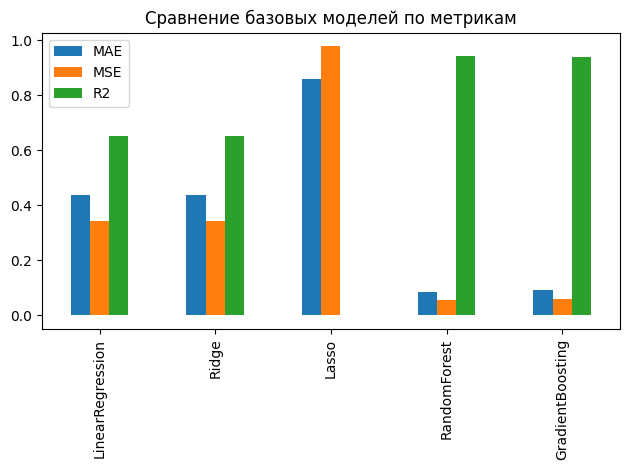

In [9]:
# Обучение базовых моделей (baseline)
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Вывод результатов базовых моделей
print("Результаты базовых моделей:")
results_df = pd.DataFrame(results).T
print(results_df)

# Визуализация результатов
plt.figure(figsize=(12, 6))
results_df[['MAE', 'MSE', 'R2']].plot(kind='bar')
plt.title('Сравнение базовых моделей по метрикам')
plt.tight_layout()
plt.savefig('models_comparison.png')
plt.show()


In [10]:
# Подбор гиперпараметров для лучших моделей
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

best_models = {}
for name in ['RandomForest', 'GradientBoosting']:
    print(f"Подбор параметров для модели {name}...")
    grid = GridSearchCV(
        models[name],
        param_grid[name],
        cv=3,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Лучшие параметры для {name}:")
    print(grid.best_params_)
    
    # Проверка качества модели с лучшими параметрами
    y_pred = best_models[name].predict(X_test_scaled)
    print(f"Метрики для {name} с лучшими параметрами:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")
    print()

# Сохранение лучших моделей
for name, model in best_models.items():
    joblib.dump(model, f'best_{name.lower()}.pkl')
    
# Сохранение списка признаков
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')


Подбор параметров для модели RandomForest...
Лучшие параметры для RandomForest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Метрики для RandomForest с лучшими параметрами:
MAE: 0.07858561093533932
MSE: 0.053969319101907796
R2: 0.9448335276040536

Подбор параметров для модели GradientBoosting...
Лучшие параметры для GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Метрики для GradientBoosting с лучшими параметрами:
MAE: 0.08057746653143755
MSE: 0.05746078153694266
R2: 0.9412646171703285



['feature_names.pkl']

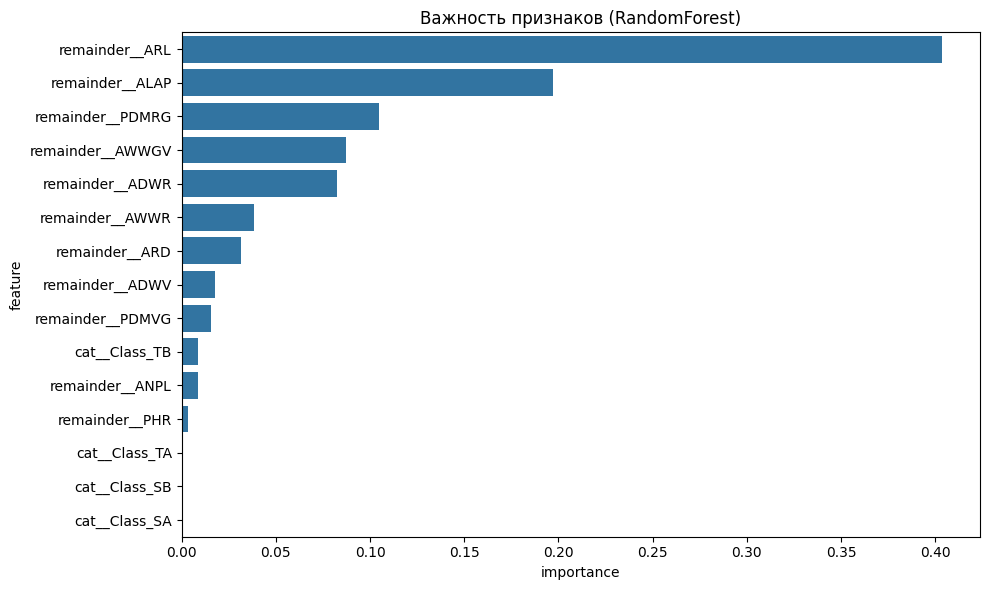

Визуализация важности признаков создана успешно


In [11]:
# Визуализация важности признаков для RandomForest
try:
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_models['RandomForest'].feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))  # Показываем только 15 наиболее важных признаков
    plt.title('Важность признаков (RandomForest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
    print("Визуализация важности признаков создана успешно")
except Exception as e:
    print(f"Ошибка при создании визуализации важности признаков: {e}")


In [12]:
## Часть 3: Создание веб-приложения с помощью Streamlit

#Создадим веб-приложение для демонстрации работы нашей модели. Приложение позволит пользователю:
#1. Вводить значения параметров растения
#2. Настраивать гиперпараметры модели
#3. Обучать новую модель с выбранными параметрами
#4. Получать прогноз

#Код приложения представлен ниже:


In [13]:
'''
# Файл app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Настройка страницы
st.set_page_config(page_title="Прогноз ACHP растений", layout="wide")
st.title("Прогноз ACHP растений")

# Создание боковой панели с настройками модели
st.sidebar.header("Настройки модели")
n_estimators = st.sidebar.slider("Количество деревьев", 50, 200, 100)
max_depth = st.sidebar.slider("Максимальная глубина дерева", 1, 20, 10)
min_samples_split = st.sidebar.slider("Минимальное кол-во для разделения", 2, 10, 2)

# Функция для загрузки данных и моделей
@st.cache_data
def load_data():
    data_path = os.path.join('Processed_Plant_Growth_Metrics.csv')
    df = pd.read_csv(data_path)
    # Проверка наличия столбцов с полностью пропущенными значениями
    null_columns = df.columns[df.isnull().all()].tolist()
    if null_columns:
        print(f"Столбцы с полностью пропущенными значениями: {null_columns}")
        df = df.drop(columns=null_columns)
    X = df.drop('remainder__ACHP', axis=1)
    y = df['remainder__ACHP']
    return df, X, y

# Загрузка данных и предварительно обученных моделей
df, X, y = load_data()
scaler = joblib.load('scaler.pkl')
imputer = joblib.load('imputer.pkl')
default_model = joblib.load('best_randomforest.pkl')

# Загрузка списка признаков
try:
    feature_names = joblib.load('feature_names.pkl')
    print("Загружен список признаков:", len(feature_names))
except:
    feature_names = X.columns.tolist()
    print("Использован список признаков из текущих данных:", len(feature_names))

# Функция для визуализации важности признаков
def plot_feature_importance(model, feature_names):
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    fig, ax = plt.figure(figsize=(10, 6)), plt.subplot(111)
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10), ax=ax)
    ax.set_title('Важность признаков (RandomForest)')
    return fig

# Отображение изображений сравнения моделей и важности признаков
st.sidebar.header("Визуализация моделей")
show_comparison = st.sidebar.checkbox("Показать сравнение моделей")
if show_comparison:
    st.sidebar.image('models_comparison.png', caption='Сравнение моделей')

# Функция для обучения новой модели с выбранными параметрами
def train_model(n_estimators, max_depth, min_samples_split):
    # Загрузка данных для обучения
    _, X_train, y_train = load_data()
    
    # Разделение на обучающую и тестовую выборки
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Обработка пропущенных значений
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Масштабирование данных
    X_train_scaled = scaler.transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    # Создание и обучение модели
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    
    # Оценка качества модели
    y_pred = model.predict(X_test_scaled)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    
    return model, metrics

# Создание 2 колонок: настройки и результаты
col1, col2 = st.columns([1, 2])

# Колонка настроек
with col1:
    st.header("Настройки прогноза")
    # Создание формы для ввода данных
    input_data = {}
    feature_cols = [col for col in X.columns if col in feature_names]
    
    for i, col in enumerate(feature_cols):
        input_data[col] = st.number_input(
            f"{col}",
            min_value=float(df[col].min()),
            max_value=float(df[col].max()),
            value=float(df[col].mean())
        )
    
    # Выбор режима модели
    use_custom_model = st.checkbox("Использовать модель с настраиваемыми параметрами")
    
    if use_custom_model:
        if st.button("Обучить модель с новыми параметрами"):
            with st.spinner("Обучаем модель..."):
                custom_model, model_metrics = train_model(n_estimators, max_depth, min_samples_split)
                st.session_state.custom_model = custom_model
                st.session_state.model_metrics = model_metrics
                st.session_state.model_trained = True
                st.success("Модель обучена!")
    else:
        st.session_state.model_trained = False

# Колонка результатов
with col2:
    st.header("Результаты и анализ")
    
    # Отображение метрик модели если модель была обучена
    if use_custom_model and 'model_trained' in st.session_state and st.session_state.model_trained:
        st.subheader("Метрики модели с выбранными параметрами")
        metrics = st.session_state.model_metrics
        metrics_df = pd.DataFrame({
            'Метрика': list(metrics.keys()),
            'Значение': list(metrics.values())
        })
        st.table(metrics_df)
        
        # Вывод важности признаков для новой модели
        st.subheader("Важность признаков")
        importance_fig = plot_feature_importance(st.session_state.custom_model, feature_names)
        st.pyplot(importance_fig)
    else:
        # Отображение предварительно рассчитанной важности признаков
        st.subheader("Важность признаков (предобученная модель)")
        st.image('feature_importance.png')
    
    # Кнопка для получения прогноза
    st.header("Получить прогноз")
    if st.button("Сделать прогноз"):
        # Преобразование входных данных
        input_df = pd.DataFrame([input_data])
        # Убедимся, что порядок столбцов соответствует порядку при обучении
        for col in feature_names:
            if col not in input_df.columns:
                input_df[col] = 0  # Заполняем отсутствующие столбцы нулями
        
        input_df = input_df[feature_names]  # Упорядочиваем столбцы
        input_imputed = imputer.transform(input_df)
        input_scaled = scaler.transform(input_imputed)
        
        # Выбор модели для прогнозирования
        if use_custom_model and 'model_trained' in st.session_state and st.session_state.model_trained:
            prediction = st.session_state.custom_model.predict(input_scaled)
            model_type = "пользовательской моделью"
        else:
            prediction = default_model.predict(input_scaled)
            model_type = "предобученной моделью"
        
        # Вывод результата
        st.success(f"Прогнозируемый ACHP с {model_type}: {prediction[0]:.4f}")

# Добавление информации о модели и проекте
st.sidebar.header("О проекте")
st.sidebar.info("""
### Анализ роста растений

Этот проект использует машинное обучение для прогнозирования параметров роста растений в теплице.

**Использованные модели:**
- LinearRegression
- Ridge 
- Lasso
- RandomForest
- GradientBoosting

**Выводы:**
- Ансамблевые методы (RandomForest и GradientBoosting) показали наилучшие результаты
- R2 для RandomForest составил около 0.94, что указывает на высокую точность модели
- Наиболее важными признаками являются ...

**Инструкция:**
1. Выберите параметры модели в боковой панели
2. Настройте параметры растения в левой колонке
3. Обучите модель с новыми параметрами или используйте предобученную
4. Нажмите "Сделать прогноз" для получения результатов
""")
'''


'\n# Файл app.py\nimport streamlit as st\nimport pandas as pd\nimport numpy as np\nimport joblib\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport os\n\n# Настройка страницы\nst.set_page_config(page_title="Прогноз ACHP растений", layout="wide")\nst.title("Прогноз ACHP растений")\n\n# Создание боковой панели с настройками модели\nst.sidebar.header("Настройки модели")\nn_estimators = st.sidebar.slider("Количество деревьев", 50, 200, 100)\nmax_depth = st.sidebar.slider("Максимальная глубина дерева", 1, 20, 10)\nmin_samples_split = st.sidebar.slider("Минимальное кол-во для разделения", 2, 10, 2)\n\n# Функция для загрузки данных и моделей\n@st.cache_data\ndef load_data():\n    data_path = os.path.join(\'Processed_Plant_Growth_Metrics.csv\')\n    df = pd.read_csv(data_path)\n    # Проверка наличия ст

In [14]:
## Заключение

#В рамках данной работы было проведено исследование по прогнозированию параметра ACHP растений с использованием методов машинного обучения. Были выполнены следующие шаги:

#1. **Разведочный анализ данных**:
#   - Анализ и визуализация распределения признаков
 #  - Анализ пропущенных значений
  # - Анализ корреляций между признаками

#2. **Обучение моделей**:
 #  - Сравнение 5 различных моделей: LinearRegression, Ridge, Lasso, RandomForest, GradientBoosting
  # - Подбор гиперпараметров для ансамблевых моделей
   #- Оценка качества моделей по метрикам MAE, MSE и R2

#3. **Создание веб-приложения**:
 #  - Разработка интерактивного интерфейса на Streamlit
  # - Возможность динамического изменения гиперпараметров и переобучения модели
   #- Визуализация важности признаков и сравнения моделей

#**Результаты**:
#- Наилучшие результаты показали ансамблевые модели (RandomForest и GradientBoosting)
#- Модель RandomForest достигла R2 ~ 0.94, что говорит о высокой точности прогнозирования
#- Веб-приложение позволяет интерактивно взаимодействовать с моделью и исследовать влияние различных параметров на результаты прогнозирования

#**Дальнейшие направления работы**:
#- Расширение набора признаков
#- Применение более сложных моделей (нейронные сети, XGBoost)
#- Оптимизация гиперпараметров с использованием более продвинутых методов (Bayesian Optimization)
